## <font color='blue'> Convolutional Neural Networks </font>

### Introduction

[Slides](https://docs.google.com/presentation/d/1vk8nROM9U3FFO6VnsNZNUM2Y3VPSeG3kTh20yuY7qRs/edit#slide=id.p1)


![](https://assets-global.website-files.com/614c82ed388d53640613982e/646371e3bdc5ca90dee5331b_convolutional-neural-network%20(1).webp)

Source: https://www.superannotate.com/blog/guide-to-convolutional-neural-networks

### Dilated Convolutions

![](https://media.geeksforgeeks.org/wp-content/uploads/20210212153139/normalvsdilatedconv-660x333.png)


Dilated convolutions, also known as **atrous convolutions**, are a type of convolution operation where the convolutional kernel is expanded by inserting spaces (zeros) between its elements. This allows the convolution to have a larger receptive field without increasing the number of parameters or the computational cost significantly.

---

### **Understanding the Main Idea**

#### **Standard Convolution**

In a standard convolution operation, a kernel (filter) slides over an input feature map, and at each position, it computes the dot product between the kernel weights and the corresponding input values. The kernel elements are applied to adjacent input pixels.

- **Kernel Size ($ K $)**: The dimensions of the kernel (e.g., $ 3 \times 3 $).
- **Stride ($ S $)**: How many pixels the kernel moves after each operation.
- **Padding ($ P $)**: Adding zeros around the input to control the output size.
- **Dilation ($ D $)**: In standard convolution, $ D = 1 $.

#### **Dilated Convolution**

In a dilated convolution, the kernel is "dilated" by inserting spaces between its elements. This is controlled by the **dilation rate ($ D $)**, which specifies the spacing between kernel elements.

- **Dilation Rate ($ D $)**: The factor by which the kernel is dilated. A dilation rate of $ D = 1 $ means no dilation (standard convolution).
- **Effective Kernel Size**: The actual area of the input covered by the dilated kernel.

**Mathematically**, for a 2D input, the output $ y[i, j] $ of a dilated convolution is calculated as:

$$
y[i, j] = \sum_{m=0}^{K-1} \sum_{n=0}^{K-1} x[i + D \cdot m, j + D \cdot n] \cdot w[m, n]
$$

- $ x $: Input feature map.
- $ w $: Kernel weights.
- $ K $: Kernel size.
- $ D $: Dilation rate.

---

### **Visual Explanation**

Consider a $ 3 \times 3 $ kernel:

- **Standard Convolution ($ D = 1 $)**:

  The kernel covers a $ 3 \times 3 $ area of the input without any gaps.

- **Dilated Convolution ($ D = 2 $)**:

  The kernel elements are spaced out, covering a larger area. The receptive field becomes $ 5 \times 5 $, but the kernel still has only 9 parameters.

**Visualization**:

- **Standard Kernel**:

  ```
  [w00 w01 w02]
  [w10 w11 w12]
  [w20 w21 w22]
  ```

- **Dilated Kernel ($ D = 2 $)**:

  ```
  w00   0   w01   0   w02
   0    0    0    0    0
  w10   0   w11   0   w12
   0    0    0    0    0
  w20   0   w21   0   w22
  ```

---

### **Effect of Dilation on Receptive Field**

- **Receptive Field**: The area of the input that affects a particular output value.
- **Dilated Convolution**: Increases the receptive field exponentially without increasing the number of parameters or the computational cost linearly.

**Effective Kernel Size Calculation**:

$$
K_{\text{effective}} = K + (K - 1) \times (D - 1)
$$

- For $ K = 3 $ and $ D = 2 $:

  $$
  K_{\text{effective}} = 3 + (3 - 1) \times (2 - 1) = 3 + 2 \times 1 = 5
  $$

- The kernel now effectively covers a $ 5 \times 5 $ area.

---

### **Why Use Dilated Convolutions?**

1. **Larger Receptive Field**: Capture more context and global information without increasing the model's depth or the number of parameters.

2. **Efficient Computation**: Maintain computational efficiency compared to using larger kernels or deeper networks.

3. **Control Over Resolution**: Increase receptive field size without downsampling the feature maps, preserving spatial resolution.

4. **Multi-Scale Feature Extraction**: Useful in tasks where understanding patterns at various scales is essential (e.g., semantic segmentation).

---

### **Practical Applications**

- **Semantic Segmentation**: Models like DeepLab use dilated convolutions to capture multi-scale context without reducing the spatial resolution of feature maps.

- **Audio and Time-Series Analysis**: In models like WaveNet, dilated convolutions model long-range dependencies efficiently.

---

### **Example Calculation**

Let's work through an example to see how dilation affects the output size.

**Parameters**:

- Input Size: $ H_{in} = W_{in} = 32 $
- Kernel Size: $ K = 3 $
- Dilation Rate: $ D = 2 $
- Stride: $ S = 1 $
- Padding: $ P = D $

**Effective Kernel Size**:

$$
K_{\text{effective}} = K + (K - 1) \times (D - 1) = 3 + 2 \times 1 = 5
$$

**Output Size Calculation**:

$$
\text{Output Size} = \left\lfloor \frac{H_{in} + 2P - K_{\text{effective}}}{S} + 1 \right\rfloor
$$

Substitute the values:

$$
\text{Output Size} = \left\lfloor \frac{32 + 2 \times 2 - 5}{1} + 1 \right\rfloor = \left\lfloor \frac{32 + 4 - 5}{1} + 1 \right\rfloor = \left\lfloor 31 + 1 \right\rfloor = 32
$$

**Explanation**:

- The dilation increases the effective size of the kernel to $ 5 \times 5 $.
- Padding is set to $ P = D = 2 $ to maintain the output size.
- The output size remains $ 32 \times 32 $.

---

### **Implementing Dilated Convolutions in PyTorch**

In PyTorch, dilated convolutions are implemented using the `dilation` parameter in the `nn.Conv2d` module.

**Example**:

```python
import torch
import torch.nn as nn

# Define a dilated convolutional layer
conv_layer = nn.Conv2d(
    in_channels=16,
    out_channels=32,
    kernel_size=3,
    stride=1,
    padding=2,   # Adjust padding to maintain output size
    dilation=2   # Dilation rate
)

# Input tensor with shape (batch_size, in_channels, height, width)
input_tensor = torch.randn(1, 16, 32, 32)

# Output tensor
output_tensor = conv_layer(input_tensor)

print(f"Output shape: {output_tensor.shape}")
```

**Note on Padding**:

- To maintain the output size, padding should be set to $ P = D $.
- If you want to compute the padding needed to maintain the output size:

  $$
  P = D \times \frac{K - 1}{2}
  $$

---

### **Advantages and Considerations**

#### **Advantages**:

- **Efficient Contextual Understanding**: Captures global information without a significant increase in computation.
- **Parameter Efficiency**: Larger receptive fields without more parameters.
- **Flexibility**: Can be combined with different dilation rates in parallel or sequential layers to capture features at multiple scales.

#### **Considerations**:

- **Gridding Artifacts**: High dilation rates can cause checkerboard patterns or gridding artifacts in the output because of the sparse sampling of input pixels.
- **Balancing Dilation and Kernel Size**: Choosing the right combination is crucial for optimal performance.

---

### **Real-World Example: Semantic Segmentation**

In semantic segmentation, the goal is to assign a label to every pixel in an image. This requires understanding both local details and global context.

- **Dilated Convolutions** allow the model to capture larger context without reducing the resolution.
- **DeepLab Series**: Uses dilated convolutions with varying dilation rates to capture multi-scale information.

---

### **Summary**

- **Dilations in CNNs** refer to the expansion of convolutional kernels by inserting zeros between elements, controlled by the dilation rate $ D $.
- **Dilated Convolutions** increase the receptive field without increasing the number of parameters or computational cost significantly.
- **Effective Kernel Size**:

  $$
  K_{\text{effective}} = K + (K - 1) \times (D - 1)
  $$

- **Benefits**:

  - Larger receptive fields.
  - Efficient computation.
  - Preservation of spatial resolution.

- **Applications**:

  - Semantic segmentation.
  - Audio processing.
  - Any task requiring multi-scale context understanding.

---

### **Key Ideas**

- **Dilation Rate ($ D $)**:

  - $ D = 1 $: Standard convolution.
  - $ D > 1 $: Dilated convolution with increased receptive field.

- **Padding ($ P $)**:

  - Must be adjusted to maintain output size.
  - Commonly set to $ P = D \times \frac{K - 1}{2} $.

- **Output Size Formula**:

  $$
  \text{Output Size} = \left\lfloor \frac{\text{Input Size} + 2P - K_{\text{effective}}}{S} + 1 \right\rfloor
  $$

---

### **Further Exploration**

- **Experimentation**: Try different dilation rates in convolutional layers to see their effect on the receptive field and performance.
- **Combining Dilations**: Use layers with different dilation rates to capture features at multiple scales.
- **Avoiding Artifacts**: Be cautious of large dilation rates that may lead to gridding artifacts.



### Arithmetic of Convolutions

 It's essential to understand how the dimensions of your data change after each convolutional layer. This involves calculating the output size based on the input size and the convolution parameters such as kernel size, stride, padding, and dilation. Below is included a comprehensive guide to help you navigate the arithmetic of sizes for 2D convolutions in PyTorch.

---



### **Basics of 2D Convolutions**

In PyTorch, a 2D convolutional layer is created using `nn.Conv2d`. The key parameters are:

- **`in_channels`**: Number of channels in the input image.
- **`out_channels`**: Number of channels produced by the convolution.
- **`kernel_size`**: Size of the convolving kernel (filter).
- **`stride`**: Stride of the convolution (how the filter moves over the input).
- **`padding`**: Zero-padding added to both sides of the input.
- **`dilation`**: Spacing between kernel elements.

---

### **Calculating Output Dimensions**

The output dimensions of a convolutional layer can be calculated using the following formula for each spatial dimension (height and width):

$$
\text{Output Size} = \left\lfloor \frac{\text{Input Size} + 2 \times \text{Padding} - \text{Dilation} \times (\text{Kernel Size} - 1) - 1}{\text{Stride}} + 1 \right\rfloor
$$

- **Input Size ($ H_{in} $ or $ W_{in} $)**: The size of the input tensor along height or width.
- **Padding ($ P $)**: The number of pixels added to each side of the input.
- **Kernel Size ($ K $)**: The size of the convolution kernel.
- **Stride ($ S $)**: The step size with which the kernel moves over the input.
- **Dilation ($ D $)**: The spacing between elements in the kernel.

---

### **Understanding Each Parameter**

- **Kernel Size ($ K $)**: Affects the receptive field of the convolution. Larger kernels capture more spatial context.
- **Stride ($ S $)**: Controls how the filter convolves around the input volume. Larger strides reduce the output size.
- **Padding ($ P $)**: Adds zeros around the input to control the spatial size of the output. Commonly used padding values are:
  - **Valid Padding**: No padding ($ P = 0 $).
  - **Same Padding**: Padding such that the output size is the same as the input size.
- **Dilation ($ D $)**: Expands the kernel by inserting spaces between its elements, increasing the receptive field without increasing the kernel size.

---

### **Step-by-Step Examples**

#### **Example 1: Basic Convolution**

**Parameters**:
- Input Size: $ H_{in} = 32 $, $ W_{in} = 32 $
- Kernel Size: $ K = 3 $
- Padding: $ P = 1 $
- Stride: $ S = 1 $
- Dilation: $ D = 1 $

**Calculation**:
$$
\text{Output Size} = \left\lfloor \frac{32 + 2 \times 1 - 1 \times (3 - 1) - 1}{1} + 1 \right\rfloor = 32
$$

**Explanation**: With padding of 1 and a kernel size of 3, the output size remains the same as the input size.

---

#### **Example 2: Convolution with No Padding**

**Parameters**:
- Input Size: $ H_{in} = 32 $, $ W_{in} = 32 $
- Kernel Size: $ K = 5 $
- Padding: $ P = 0 $
- Stride: $ S = 1 $
- Dilation: $ D = 1 $

**Calculation**:
$$
\text{Output Size} = \left\lfloor \frac{32 + 0 - 1 \times (5 - 1) - 1}{1} + 1 \right\rfloor = 28
$$

**Explanation**: Without padding, the output size decreases because the kernel cannot slide over the edges of the input.

---

#### **Example 3: Convolution with Stride**

**Parameters**:
- Input Size: $ H_{in} = 64 $, $ W_{in} = 64 $
- Kernel Size: $ K = 3 $
- Padding: $ P = 0 $
- Stride: $ S = 2 $
- Dilation: $ D = 1 $

**Calculation**:
$$
\text{Output Size} = \left\lfloor \frac{64 + 0 - 1 \times (3 - 1) - 1}{2} + 1 \right\rfloor = 31
$$

**Explanation**: A stride of 2 effectively halves the spatial dimensions of the output.

---

#### **Example 4: Convolution with Dilation**

**Parameters**:
- Input Size: $ H_{in} = 32 $, $ W_{in} = 32 $
- Kernel Size: $ K = 3 $
- Padding: $ P = 1 $
- Stride: $ S = 1 $
- Dilation: $ D = 2 $

**Effective Kernel Size**:
$$
K_{\text{effective}} = D \times (K - 1) + 1 = 2 \times 2 + 1 = 5
$$

**Calculation**:
$$
\text{Output Size} = \left\lfloor \frac{32 + 2 \times 1 - 5 - 1}{1} + 1 \right\rfloor = 29
$$

**Explanation**: Dilation increases the effective kernel size, which reduces the output size.

---

### **Practical Tips**

- **Consistent Output Size**: To keep the output size the same as the input size, adjust the padding appropriately. For a kernel size $ K $ and dilation $ D $, padding should be:
  $$
  P = \frac{D \times (K - 1)}{2}
  $$
- **Avoiding Fractional Outputs**: Ensure that the numerator in the output size formula is divisible by the stride to avoid fractional outputs.
- **Stacking Layers**: When stacking multiple convolutional layers, compute the output size after each layer to ensure compatibility.

---

### **Example: Designing a Convolutional Neural Network**

Suppose you have the following architecture:

1. **Conv Layer 1**:
   - Input Size: $ 64 \times 64 $
   - Kernel Size: $ 3 $
   - Padding: $ 1 $
   - Stride: $ 1 $
   - Output Size: $ 64 \times 64 $ (calculated using the formula)

2. **Max Pooling Layer**:
   - Kernel Size: $ 2 $
   - Stride: $ 2 $
   - Output Size: $ 32 \times 32 $

3. **Conv Layer 2**:
   - Input Size: $ 32 \times 32 $
   - Kernel Size: $ 3 $
   - Padding: $ 1 $
   - Stride: $ 1 $
   - Output Size: $ 32 \times 32 $

**Explanation**: By carefully choosing the parameters, you can design a network that progressively reduces spatial dimensions in a controlled manner.




### Applications Include

1. **Image Classification**:
   - **Object Recognition**: Identifying objects within an image (e.g., recognizing dogs, cats, cars).
   - **Scene Classification**: Categorizing the scene depicted in an image (e.g., beach, forest, city).

2. **Object Detection**:
   - **Face Detection**: Detecting human faces in images for applications like security, photo tagging, and more.
   - **Pedestrian Detection**: Used in autonomous driving and surveillance systems.

3. **Image Segmentation**:
   - **Semantic Segmentation**: Classifying each pixel in an image into a category (e.g., separating roads, buildings, cars in a cityscape).
   - **Instance Segmentation**: Distinguishing between different instances of objects in an image (e.g., identifying and separating multiple people).

4. **Medical Imaging**:
   - **Disease Diagnosis**: Analyzing medical images (e.g., X-rays, MRIs) to detect diseases like cancer, Alzheimer's, and retinal diseases.
   - **Organ Segmentation**: Identifying and segmenting organs in medical scans for surgical planning and diagnosis.

5. **Self-driving Cars**:
   - **Road Sign Recognition**: Detecting and classifying traffic signs.
   - **Lane Detection**: Identifying lane boundaries on the road.
   - **Obstacle Detection**: Detecting pedestrians, other vehicles, and obstacles.

6. **Facial Recognition and Authentication**:
   - **Face Recognition**: Identifying or verifying a person from an image or video frame.
   - **Emotion Recognition**: Analyzing facial expressions to determine emotions.

7. **Robotics and Automation**:
   - **Object Grasping**: Identifying objects and determining how to grasp them in robotic manipulation.
   - **Navigation**: Helping robots understand their environment for autonomous navigation.

8. **Augmented Reality (AR) and Virtual Reality (VR)**:
   - **Object Tracking**: Tracking objects in real-time to augment digital information onto the real world.
   - **Environment Understanding**: Understanding and mapping the environment for immersive VR experiences.

9. **Natural Language Processing (NLP)**:
   - **Text Classification**: Classifying text into categories (e.g., spam detection, sentiment analysis).
   - **Character Recognition**: Recognizing handwritten or printed text from images (e.g., OCR).

10. **Art and Creativity**:
    - **Style Transfer**: Applying the style of one image to another (e.g., making a photo look like a painting).
    - **Image Generation**: Creating new images from scratch (e.g., GANs for generating realistic photos).

11. **Super-Resolution and Image Enhancement**:
    - **Image Denoising**: Removing noise from images to enhance quality.
    - **Image Super-Resolution**: Increasing the resolution of images for better clarity and detail.


### Code Applications
---

#### Example 1 - Fashion MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
# Download and load the training and test datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=53, shuffle=True)
# you can specify batsh size for the test if you plan to check the results at each time of the training process
test_loader = DataLoader(dataset=test_dataset, batch_size=53, shuffle=False)

In [6]:
for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Shape of X [N, C, H, W]: torch.Size([53, 1, 28, 28])
Shape of y: torch.Size([53]) torch.int64


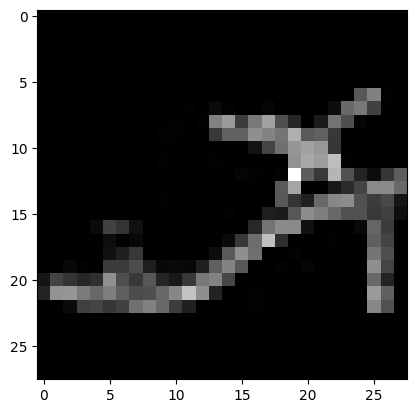

Sandal


In [7]:
# look at some sample images
i = 5
plt.imshow(X[i,0,:],cmap='gray')
plt.show()
print(class_names[y[i].item()])

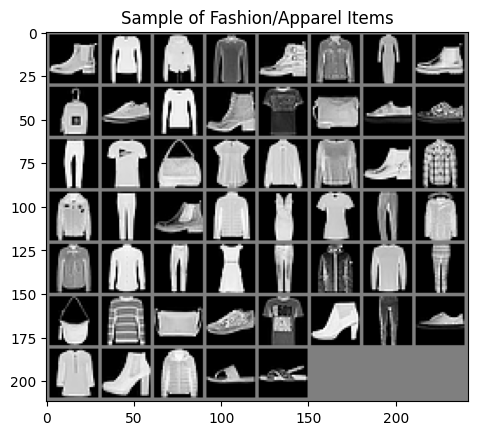

First Label: T-shirt/top


In [8]:
# Function to display images
def imshow(img, label):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Sample of Fashion/Apparel Items')
    #plt.title(f'First Item: {class_names[label]}')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images), labels[0])

# Display the name of the label for the first image in the batch
print(f'First Label: {class_names[labels[29]]}')

#### What happens if we do not use convolutions/feature extractions

In [9]:
class NeuralNetwork(nn.Module): # almost always the input is the same
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential( # it means we have a sequence of layers of neurons
            nn.Linear(28*28, 256), # this one is the first layer of the network
            nn.ReLU(), # we want here the simplest activations
            nn.Linear(256, 512), # the second layer of neurons, here we got 512 neurons
            nn.ReLU(), # again simple activations, the same for all such as ReLU
            nn.Linear(512, 10) # output -> 10 neurons b/c we predict ten probability values
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device) # this means your network will run on the device you chose
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
# here we define the training procedure
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader): # this is the must-have iterator
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 50 == 0:
            loss, current = loss.item(), (batch + 1)*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [12]:
# to evaluate the trained model onto the Test data
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # we set the model in evaluation state
    test_loss, correct = 0, 0
    with torch.no_grad(): # a must-have for model.eval()
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [13]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300606  [   53/60000]
loss: 0.895745  [ 2703/60000]
loss: 0.474591  [ 5353/60000]
loss: 0.457244  [ 8003/60000]
loss: 0.308422  [10653/60000]
loss: 0.647625  [13303/60000]
loss: 0.424673  [15953/60000]
loss: 0.457899  [18603/60000]
loss: 0.396334  [21253/60000]
loss: 0.468100  [23903/60000]
loss: 0.344178  [26553/60000]
loss: 0.427117  [29203/60000]
loss: 0.477902  [31853/60000]
loss: 0.267700  [34503/60000]
loss: 0.644277  [37153/60000]
loss: 0.381386  [39803/60000]
loss: 0.404504  [42453/60000]
loss: 0.325641  [45103/60000]
loss: 0.586384  [47753/60000]
loss: 0.653288  [50403/60000]
loss: 0.208112  [53053/60000]
loss: 0.439836  [55703/60000]
loss: 0.527931  [58353/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.428942 

Epoch 2
-------------------------------
loss: 0.326410  [   53/60000]
loss: 0.271895  [ 2703/60000]
loss: 0.591504  [ 5353/60000]
loss: 0.562260  [ 8003/60000]
loss: 0.444405  [10653/60000]
loss: 0.377418  [13303/60000

#### The benefit of convolutions:

In [14]:
# Define the convolutional model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 50, kernel_size=3, padding=1),
            nn.BatchNorm2d(50), # this is the z-score StandardScaler
            nn.ReLU(), # activations
            nn.MaxPool2d(kernel_size=2, stride=2), # summarizations to address the enlarged memory footprint
            nn.Dropout(p=0.25) # cutting dendrites randomly to prevent dead neurons
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(50, 100, kernel_size=3),
            nn.BatchNorm2d(100),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Dropout(p=0.25)
        )
        self.fc1 = nn.Linear(100*6*6, 1000) # here we pass on the 100 features extracted and each feature is now 6x6
        self.fc2 = nn.Linear(1000, 10) # is non-negotiable

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out) # here we got all the 100 features
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = CNN().to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # it's a must: choose the correct loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # we chose adaptive momentum gradient descent as our optimizer

# Train the model
num_epochs = 10




## How to calculate the correct sizes



### **Layer 1:**

1. **Input Size:** $28 \times 28$
2. **Convolution (`nn.Conv2d`):**
   - Kernel size = 3
   - Padding = 1
   - Stride = 1 (default for `nn.Conv2d`)
   - Formula:
     $$
     \text{Output Size} = \left\lfloor \frac{\text{Input Size} + 2 \cdot \text{Padding} - \text{Kernel Size}}{\text{Stride}} \right\rfloor + 1
     $$
   - Substituting values:
     $$
     \text{Output Size} = \left\lfloor \frac{28 + 2 \cdot 1 - 3}{1} \right\rfloor + 1 = 28
     $$
   - Output size after convolution: $28 \times 28$, with 50 channels.

3. **Batch Normalization (`nn.BatchNorm2d`) and ReLU:**
   - These do not change the spatial dimensions.
   - Output size remains $28 \times 28 \times 50$.

4. **MaxPooling (`nn.MaxPool2d`):**
   - Kernel size = 2, Stride = 2
   - Formula:
     $$
     \text{Output Size} = \left\lfloor \frac{\text{Input Size} - \text{Kernel Size}}{\text{Stride}} \right\rfloor + 1
     $$
   - Substituting values:
     $$
     \text{Output Size} = \left\lfloor \frac{28 - 2}{2} \right\rfloor + 1 = 14
     $$
   - Output size after pooling: $14 \times 14 \times 50$.

5. **Dropout (`nn.Dropout`):**
   - Dropout randomly disables neurons but does not affect spatial dimensions.
   - Output size remains $14 \times 14 \times 50$.

---

### **Layer 2:**

1. **Input Size:** $14 \times 14$ (from the output of Layer 1).
2. **Convolution (`nn.Conv2d`):**
   - Kernel size = 3
   - Padding = 0 (default for `nn.Conv2d`)
   - Stride = 1 (default for `nn.Conv2d`)
   - Formula:
     $$
     \text{Output Size} = \left\lfloor \frac{\text{Input Size} + 2 \cdot \text{Padding} - \text{Kernel Size}}{\text{Stride}} \right\rfloor + 1
     $$
   - Substituting values:
     $$
     \text{Output Size} = \left\lfloor \frac{14 + 2 \cdot 0 - 3}{1} \right\rfloor + 1 = 12
     $$
   - Output size after convolution: $12 \times 12$, with 100 channels.

3. **Batch Normalization (`nn.BatchNorm2d`) and ReLU:**
   - These do not change the spatial dimensions.
   - Output size remains $12 \times 12 \times 100$.

4. **MaxPooling (`nn.MaxPool2d`):**
   - Kernel size = 2, Stride = 2
   - Formula:
     $$
     \text{Output Size} = \left\lfloor \frac{\text{Input Size} - \text{Kernel Size}}{\text{Stride}} \right\rfloor + 1
     $$
   - Substituting values:
     $$
     \text{Output Size} = \left\lfloor \frac{12 - 2}{2} \right\rfloor + 1 = 6
     $$
   - Output size after pooling: $6 \times 6 \times 100$.

5. **Dropout (`nn.Dropout`):**
   - Dropout does not affect spatial dimensions.
   - Output size remains $6 \times 6 \times 100$.

---

### Final Output:
- After `layer1`: $14 \times 14 \times 50$
- After `layer2`: $6 \times 6 \times 100$



In [15]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/1133], Loss: 0.5504
Epoch [1/10], Step [200/1133], Loss: 0.5609
Epoch [1/10], Step [300/1133], Loss: 0.5215
Epoch [1/10], Step [400/1133], Loss: 0.4990
Epoch [1/10], Step [500/1133], Loss: 0.3018
Epoch [1/10], Step [600/1133], Loss: 0.3595
Epoch [1/10], Step [700/1133], Loss: 0.3266
Epoch [1/10], Step [800/1133], Loss: 0.4121
Epoch [1/10], Step [900/1133], Loss: 0.4270
Epoch [1/10], Step [1000/1133], Loss: 0.6635
Epoch [1/10], Step [1100/1133], Loss: 0.6367
Epoch [2/10], Step [100/1133], Loss: 0.2551
Epoch [2/10], Step [200/1133], Loss: 0.3782
Epoch [2/10], Step [300/1133], Loss: 0.4120
Epoch [2/10], Step [400/1133], Loss: 0.3763
Epoch [2/10], Step [500/1133], Loss: 0.1973
Epoch [2/10], Step [600/1133], Loss: 0.3862
Epoch [2/10], Step [700/1133], Loss: 0.1846
Epoch [2/10], Step [800/1133], Loss: 0.3248
Epoch [2/10], Step [900/1133], Loss: 0.4289
Epoch [2/10], Step [1000/1133], Loss: 0.4221
Epoch [2/10], Step [1100/1133], Loss: 0.3226
Epoch [3/10], Step [100/1133

In [17]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 91.81%


In [18]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.230713  [   53/60000]
loss: 0.264731  [ 2703/60000]
loss: 0.214258  [ 5353/60000]
loss: 0.173733  [ 8003/60000]
loss: 0.028410  [10653/60000]
loss: 0.336782  [13303/60000]
loss: 0.395700  [15953/60000]
loss: 0.077317  [18603/60000]
loss: 0.073566  [21253/60000]
loss: 0.237652  [23903/60000]
loss: 0.151498  [26553/60000]
loss: 0.162659  [29203/60000]
loss: 0.180947  [31853/60000]
loss: 0.214755  [34503/60000]
loss: 0.246864  [37153/60000]
loss: 0.139448  [39803/60000]
loss: 0.169462  [42453/60000]
loss: 0.149470  [45103/60000]
loss: 0.127557  [47753/60000]
loss: 0.123837  [50403/60000]
loss: 0.130532  [53053/60000]
loss: 0.443628  [55703/60000]
loss: 0.169914  [58353/60000]
Test Error: 
 Accuracy: 91.7%, Avg loss: 0.235248 

Epoch 2
-------------------------------
loss: 0.277183  [   53/60000]
loss: 0.144463  [ 2703/60000]
loss: 0.201455  [ 5353/60000]
loss: 0.146122  [ 8003/60000]
loss: 0.184445  [10653/60000]
loss: 0.042934  [13303/60000

#### Exercise: Apply similar designs for the US Postal Service data (MNIST), and the handwritten letters, EMNIST data.

In [ ]:
# Download and load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# you can specify batsh size for the test if you plan to check the results at each time of the training process
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5079224.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134439.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1257690.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5486903.45it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



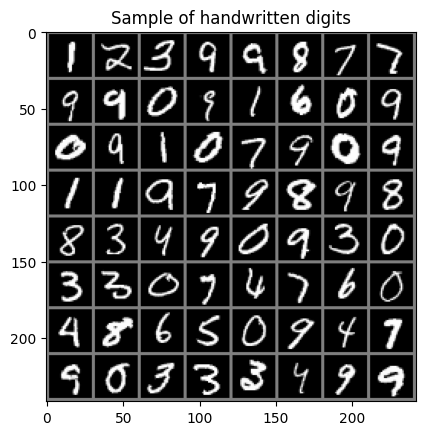

First Label: 1


In [ ]:
# Function to display images
def imshow(img, label):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Sample of handwritten digits')
    #plt.title(f'First Item: {label}')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images), labels[0])

# Display the name of the label for the first image in the batch
print(f'First Label: {labels[0]}')

#### Exercise: Develop a CNN for the [CiFar10](https://www.cs.toronto.edu/~kriz/cifar.html) data.